In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"
key = "z"
quantile = "1"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

12it [00:00, 119.83it/s]

21it [00:00, 107.34it/s]

35it [00:00, 113.63it/s]

49it [00:00, 118.42it/s]

63it [00:00, 123.28it/s]

74it [00:00, 108.08it/s]

86it [00:00, 110.70it/s]

97it [00:00, 104.13it/s]

110it [00:00, 109.15it/s]

124it [00:01, 115.50it/s]

138it [00:01, 121.60it/s]

151it [00:01, 121.93it/s]

165it [00:01, 124.49it/s]

178it [00:01, 124.41it/s]

191it [00:01, 124.57it/s]

204it [00:01, 110.22it/s]

218it [00:01, 115.94it/s]

233it [00:01, 123.07it/s]

246it [00:02, 123.13it/s]

261it [00:02, 127.95it/s]

275it [00:02, 112.42it/s]

289it [00:02, 119.40it/s]

302it [00:02, 109.81it/s]

316it [00:02, 115.54it/s]

330it [00:02, 121.70it/s]

344it [00:02, 125.72it/s]

358it [00:02, 129.43it/s]

372it [00:03, 125.50it/s]

385it [00:03, 123.87it/s]

398it [00:03, 114.13it/s]

412it [00:03, 120.54it/s]

427it [00:03, 126.02it/s]

442it [00:03, 130.03it/s]

457it [00:03, 133.12it/s]

472it [00:03, 135.29it/s]

487it [00:03, 136.67it/s]

501it [00:04, 136.06it/s]

516it [00:04, 137.63it/s]

530it [00:04, 137.97it/s]

544it [00:04, 134.97it/s]

559it [00:04, 137.11it/s]

573it [00:04, 136.84it/s]

587it [00:04, 137.24it/s]

602it [00:04, 138.46it/s]

616it [00:04, 132.10it/s]

630it [00:05, 129.14it/s]

645it [00:05, 132.92it/s]

659it [00:05, 134.39it/s]

673it [00:05, 136.01it/s]

688it [00:05, 138.22it/s]

702it [00:05, 138.58it/s]

716it [00:05, 119.80it/s]

729it [00:05, 120.06it/s]

743it [00:05, 123.88it/s]

756it [00:06, 120.84it/s]

769it [00:06, 110.02it/s]

783it [00:06, 116.39it/s]

797it [00:06, 120.43it/s]

810it [00:06, 122.32it/s]

823it [00:06, 106.08it/s]

836it [00:06, 111.51it/s]

850it [00:06, 117.98it/s]

865it [00:06, 123.99it/s]

879it [00:07, 127.63it/s]

893it [00:07, 127.92it/s]

906it [00:07, 128.45it/s]

919it [00:07, 121.88it/s]

934it [00:07, 127.08it/s]

947it [00:07, 121.93it/s]

960it [00:07, 121.25it/s]

974it [00:07, 125.96it/s]

988it [00:07, 129.61it/s]

1002it [00:08, 132.22it/s]

1016it [00:08, 134.14it/s]

1030it [00:08, 135.17it/s]

1044it [00:08, 136.32it/s]

1058it [00:08, 133.53it/s]

1073it [00:08, 135.97it/s]

1087it [00:08, 135.42it/s]

1101it [00:08, 135.53it/s]

1116it [00:08, 137.25it/s]

1130it [00:08, 138.00it/s]

1144it [00:09, 119.73it/s]

1157it [00:09, 105.71it/s]

1171it [00:09, 112.51it/s]

1185it [00:09, 118.19it/s]

1198it [00:09, 121.46it/s]

1212it [00:09, 124.14it/s]

1227it [00:09, 128.91it/s]

1242it [00:09, 132.38it/s]

1256it [00:10, 125.46it/s]


0it [00:00, ?it/s]

14it [00:00, 139.37it/s]

Number of empty sat catalogs is 0


21it [00:00, 101.97it/s]

30it [00:00, 96.02it/s] 

40it [00:00, 96.22it/s]

55it [00:00, 106.08it/s]

65it [00:00, 97.74it/s] 

75it [00:00, 98.01it/s]

85it [00:00, 96.94it/s]

95it [00:00, 96.27it/s]

106it [00:01, 99.11it/s]

118it [00:01, 103.99it/s]

133it [00:01, 112.68it/s]

148it [00:01, 120.67it/s]

162it [00:01, 123.30it/s]

175it [00:01, 120.52it/s]

190it [00:01, 126.36it/s]

204it [00:01, 130.01it/s]

218it [00:01, 132.83it/s]

232it [00:02, 133.90it/s]

246it [00:02, 109.46it/s]

261it [00:02, 117.58it/s]

274it [00:02, 115.88it/s]

289it [00:02, 122.74it/s]

304it [00:02, 128.49it/s]

318it [00:02, 129.11it/s]

332it [00:02, 119.81it/s]

345it [00:02, 119.37it/s]

360it [00:03, 125.33it/s]

375it [00:03, 131.28it/s]

390it [00:03, 136.06it/s]

406it [00:03, 140.15it/s]

421it [00:03, 141.82it/s]

436it [00:03, 141.44it/s]

451it [00:03, 118.95it/s]

464it [00:03, 109.33it/s]

479it [00:04, 116.93it/s]

494it [00:04, 123.50it/s]

508it [00:04, 127.51it/s]

522it [00:04, 112.95it/s]

534it [00:04, 104.33it/s]

549it [00:04, 113.51it/s]

562it [00:04, 117.05it/s]

576it [00:04, 122.89it/s]

591it [00:04, 128.95it/s]

606it [00:05, 132.49it/s]

621it [00:05, 135.08it/s]

636it [00:05, 138.23it/s]

651it [00:05, 140.74it/s]

666it [00:05, 141.09it/s]

681it [00:05, 141.84it/s]

696it [00:05, 135.95it/s]

711it [00:05, 139.21it/s]

726it [00:05, 140.69it/s]

741it [00:05, 140.06it/s]

756it [00:06, 118.97it/s]

769it [00:06, 111.20it/s]

781it [00:06, 102.86it/s]

792it [00:06, 84.66it/s] 

802it [00:06, 83.72it/s]

817it [00:06, 95.51it/s]

832it [00:06, 105.95it/s]

844it [00:07, 100.24it/s]

858it [00:07, 109.10it/s]

872it [00:07, 116.54it/s]

886it [00:07, 121.49it/s]

901it [00:07, 127.92it/s]

915it [00:07, 128.35it/s]

930it [00:07, 133.39it/s]

945it [00:07, 137.28it/s]

960it [00:07, 138.40it/s]

975it [00:08, 137.84it/s]

989it [00:08, 137.55it/s]

1003it [00:08, 132.45it/s]

1017it [00:08, 129.95it/s]

1031it [00:08, 128.51it/s]

1046it [00:08, 133.41it/s]

1061it [00:08, 137.04it/s]

1076it [00:08, 139.60it/s]

1091it [00:08, 142.05it/s]

1106it [00:08, 144.26it/s]

1121it [00:09, 142.90it/s]

1136it [00:09, 143.39it/s]

1151it [00:09, 145.03it/s]

1166it [00:09, 146.40it/s]

1181it [00:09, 147.23it/s]

1196it [00:09, 147.69it/s]

1211it [00:09, 147.95it/s]

1226it [00:09, 147.58it/s]

1241it [00:09, 147.59it/s]

1256it [00:09, 148.01it/s]

1256it [00:09, 125.63it/s]

Number of empty sat catalogs is 0


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

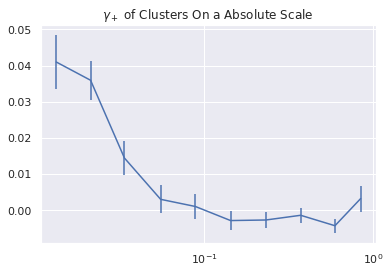

Aggregated xi:
[ -8.9759 -17.7952 -11.5026  -3.7745  -2.2522   9.156   12.9043   8.5831
  29.524   -7.4253]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -947.9541 -1910.6039 -2700.344  -3571.8117 -5013.0594 -6375.0343
 -7155.2766 -6334.0285 -3624.5975  -378.1209]
------------------------------------------------------------------------------
Aggregated npairs:
[ 219.  495.  795. 1231. 2066. 3277. 4889. 6417. 6995. 2268.]
------------------------------------------------------------------------------
Mean xi:
[-0.041  -0.0359 -0.0145 -0.0031 -0.0011  0.0028  0.0026  0.0013  0.0042
 -0.0033]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3286 -3.8598 -3.3967 -2.9016 -2.4265 -1.9454 -1.4635 -0.9871 -0.5182
 -0.1667]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

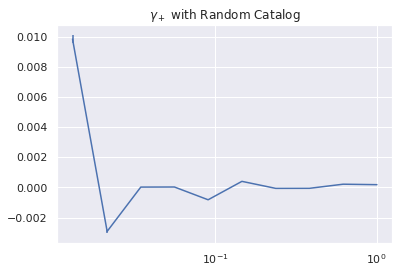

[ 9.8275e-03 -2.9159e-03  1.9740e-05  2.5301e-05 -8.2103e-04  3.9983e-04
 -6.5348e-05 -6.1656e-05  2.1127e-04  1.8010e-04]
[-2.7730e-04  8.2276e-05 -5.5699e-07 -7.1392e-07  2.3167e-05 -1.1282e-05
  1.8439e-06  1.7397e-06 -5.9613e-06 -5.0818e-06]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

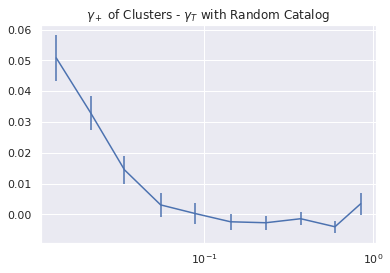

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

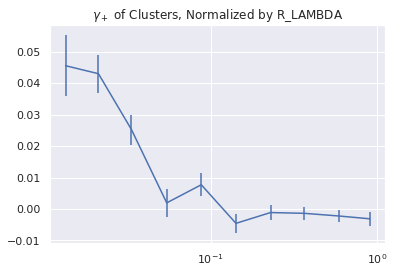

Aggregated xi:
[ -5.8356 -14.5081 -16.8443  -1.8871 -12.3881  12.0804   4.4832   7.7249
  15.3987  17.7534]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -551.2093 -1297.9745 -2261.4911 -2797.2013 -3898.1339 -5174.8026
 -5895.5391 -5670.8563 -3721.1063  -567.6458]
------------------------------------------------------------------------------
Aggregated npairs:
[ 128.  337.  666.  962. 1604. 2653. 4002. 5643. 6982. 5711.]
------------------------------------------------------------------------------
Mean xi:
[-0.0456 -0.0431 -0.0253 -0.002  -0.0077  0.0046  0.0011  0.0014  0.0022
  0.0031]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3063 -3.8516 -3.3956 -2.9077 -2.4303 -1.9505 -1.4731 -1.0049 -0.533
 -0.0994]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)